In [23]:
import gym
import random
import torch
import numpy as np
from unityagents import UnityEnvironment
from collections import deque
import matplotlib.pyplot as plt
from dqn_agent import Agent
#from Models import DuelingDQN



In [24]:
env = UnityEnvironment(file_name="/home/sebastian/Desktop/deep-reinforcement-learning/Banana_Linux/Banana.x86_64",worker_id=6, seed=1)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [25]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

In [26]:
# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print("____________________________\n")

Number of agents: 1
Number of actions: 4
States look like: [0.         1.         0.         0.         0.27946243 0.
 1.         0.         0.         0.74556106 0.         0.
 1.         0.         0.48277503 0.         1.         0.
 0.         0.30341193 0.         0.         1.         0.
 0.46494457 0.         0.         1.         0.         0.08466676
 0.         1.         0.         0.         0.95967758 0.
 0.        ]
States have length: 37
____________________________



In [27]:

try:
    agent = Agent(state_size=state_size, action_size=action_size, seed=0)
    # load the weights from file
    agent.qnetwork_local.load_state_dict(torch.load('DuelingDQN_final'))
    scores = []
    for i in range(100):
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for j in range(1500):
            action = agent.act(state, eps = 0)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   
            reward = env_info.rewards[0]                   
            done = env_info.local_done[0]
            score += reward
            state = next_state
            if done:
                scores.append(score)
                break 
except Exception as e:
    print(getattr(e, 'message', repr(e)))
    print(getattr(e, 'message', str(e)))
    traceback.print_tb(e.__traceback__)
                
finally:
    env.close()

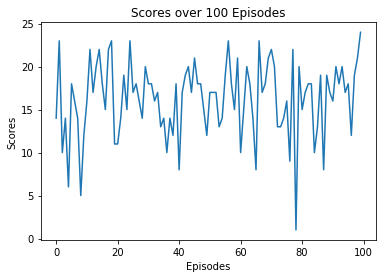

In [31]:
plt.title("Scores over 100 Episodes")
plt.xlabel("Episodes")
plt.ylabel("Scores")
plt.plot(scores)
plt.show()

In [32]:
np.array(scores).mean()

16.27